In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
# w duzym uproszczeniu - jesli nasz model ma absolute error = 11 to oznacza ze  myli sie o 11
from sklearn.model_selection import cross_val_score

In [2]:
cd "drive/My Drive/Colab Notebooks/ML_matrix_challenge"

/content/drive/My Drive/Colab Notebooks/ML_matrix_challenge


In [3]:
ls data

ls: cannot access 'data': No such file or directory


In [3]:
cd ML_matrix_challenge

/content/drive/My Drive/Colab Notebooks/ML_matrix_challenge/ML_matrix_challenge


In [4]:
ls data

men_shoes.csv


In [5]:
df = pd.read_csv('data/men_shoes.csv', low_memory=False)
df.shape
#typ zmiennych, ktore przyjmujemy nie jest zbyt optymalny, w tym przypadku dodajemy  flage i pomijamy

(18280, 48)

In [6]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [7]:
mean_price = np.mean( df['prices_amountmin'] )
mean_price
#sprawdzilismy jaka jest wartosc srednia buta

93.53952188183217

In [8]:
[1] * 5

[1, 1, 1, 1, 1]

In [9]:
y_true = df['prices_amountmin']
#ponizej warosc, ktora chcemy sprognozowac
y_pred = [mean_price] * y_true.shape[0]

#sprawdzamy, jak nasz model sobie radzi
mean_absolute_error(y_true, y_pred)

#srednia cena buta = 94 a nasz  model prognozuje 63, nie jest zle

63.968341227870624

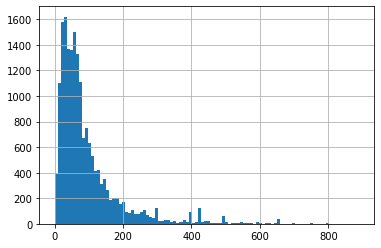

In [10]:
df['prices_amountmin'].hist(bins=100)

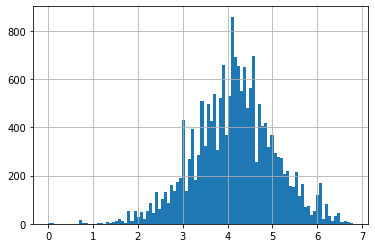

In [11]:
np.log( df['prices_amountmin'] + 1).hist(bins=100)

In [0]:
#np.log(0 + 1)

#funkcja, ktora robi to samo za nas
#np.log1p(0)

In [12]:
y_true = df['prices_amountmin']
#ponizej warosc, ktora chcemy sprognozowac
#mediana mowi o tym, ze 50% danych butow kosztuje 64 dolce lub mniej
#zwracajac jako mediane, czesciej frafiamy w wiekszosci przypadkow
y_pred = [np.median(y_true)] * y_true.shape[0]

#sprawdzamy, jak nasz model sobie radzi
mean_absolute_error(y_true, y_pred)

58.01120240700219

In [13]:

#robimy transformacje logarytmiczna
y_true = df['prices_amountmin']
#najpierw y przepuszczamy przez funkcje logarytmiczna
price_log_mean = np.mean( np.log1p(y_true) )
y_pred = [mean_price] * y_true.shape[0]

#sprawdzamy, jak nasz model sobie radzi
mean_absolute_error(y_true, y_pred)

63.968341227870624

In [14]:
np.mean( np.log1p(y_true) )
#wektor przepuszczamy przez wartosc srednia zlogarytmizowana

4.157759197235119

In [15]:
#teraz to odkrecamy
np.exp( np.mean( np.log1p(y_true) ) ) -1
#odejmujemy -1, bo gdzies wczesniej dodalismy

62.92811169273113

In [16]:
#caly zapis logarytmiczny
y_true = df['prices_amountmin']

price_log_mean = np.expm1( np.mean( np.log1p(y_true) ) ) 
y_pred = [price_log_mean] * y_true.shape[0]

#sprawdzamy, jak nasz model sobie radzi
mean_absolute_error(y_true, y_pred)

58.03539547661041

In [17]:
np.expm1( np.mean( np.log1p(y_true) ) ) 

62.92811169273113

In [18]:
#przygotowania do zastosowania model drzewa decyzyjnego
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight'],
      dtype='object')

In [19]:
df.brand.value_counts()
#musimy przypisac unikalne ID, dzieki czemu zamiast liter bedziemy miec liczby na ktorych mozna pracowac

Nike            1709
PUMA             574
Ralph Lauren     524
New Balance      361
VANS             356
                ... 
JYinstyle          1
Montblanc          1
Juanerjie          1
Snugpak            1
Covona             1
Name: brand, Length: 1856, dtype: int64

In [0]:
#przypisujemy - sposob manulany- nieefektywny, bledogenny:
#{'Nike': 1, 'Puma': 2}

#przypisujemy sposob za pomoca funkcji-

#df['brand'].factorize()[0]
#to zwroci nam dwie tuple
df['brand_cat'] = df['brand'].factorize()[0]
#powstaje nam nowa kolumna 'brand_cat'

In [21]:
feats = ['brand_cat'] 
#lista cech

X = df[ feats ].values
#x to maciez, ktora bedziemy przekazywac ma cechy: kulmny i wiersze
y = df['prices_amountmin'].values

model = DecisionTreeRegressor(max_depth=5)

scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
np.mean(scores), np.std(scores)

(-58.38655694633361, 4.223555478221712)

In [0]:
#eksperymentujemy z innymi cechami

def run_model(feats):
  X = df[ feats ].values
  #x to maciez, ktora bedziemy przekazywac ma cechy: kulmny i wiersze
  y = df['prices_amountmin'].values

  model = DecisionTreeRegressor(max_depth=5)

  scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error')
  return np.mean(scores), np.std(scores)

In [23]:
run_model(['brand_cat'])

(-58.38655694633361, 4.223555478221712)

In [0]:
#badamy dla kolumny 'manufacturer'
#utworzylismy nowa kolumne 'manufacturer_cat'
df['manufacturer_cat'] = df['manufacturer'].factorize()[0]


In [37]:
df.columns

Index(['id', 'asins', 'brand', 'categories', 'colors', 'count', 'dateadded',
       'dateupdated', 'descriptions', 'dimension', 'ean', 'features',
       'flavors', 'imageurls', 'isbn', 'keys', 'manufacturer',
       'manufacturernumber', 'merchants', 'name', 'prices_amountmin',
       'prices_amountmax', 'prices_availability', 'prices_color',
       'prices_condition', 'prices_count', 'prices_currency',
       'prices_dateadded', 'prices_dateseen', 'prices_flavor', 'prices_issale',
       'prices_merchant', 'prices_offer', 'prices_returnpolicy',
       'prices_shipping', 'prices_size', 'prices_source', 'prices_sourceurls',
       'prices_warranty', 'quantities', 'reviews', 'sizes', 'skus',
       'sourceurls', 'upc', 'vin', 'websiteids', 'weight', 'brand_cat',
       'manufacturer_cat', 'prices_shipping_cat'],
      dtype='object')

In [27]:
run_model(['manufacturer_cat'])

(-63.133649278023746, 3.394307434888982)

In [0]:

df['prices_shipping_cat'] = df['prices_shipping'].factorize()[0]

In [38]:
run_model(['prices_shipping_cat'])

(-59.668309751711945, 4.961893556884455)

In [39]:
run_model(['manufacturer_cat', 'prices_shipping_cat'])

(-59.88698037973579, 4.70408880399077)

In [40]:
!git add day4.1_matrix.ipynb

fatal: pathspec 'day4.1_matrix.ipynb' did not match any files


In [42]:
cd matrix_one

/content/drive/My Drive/Colab Notebooks/ML_matrix_challenge/ML_matrix_challenge/matrix_one


In [44]:
ls

day3_matrix.ipynb  day4.1_matrix.ipynb  day4_matrix.ipynb


In [0]:
!git add day4.1_matrix.ipynb

In [46]:
!git commit -m "create model and new features"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@400e2448db25.(none)')


In [48]:
!git push -u origin master

Branch 'master' set up to track remote branch 'master' from 'origin'.
Everything up-to-date


In [49]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes to be committed:
  (use "git reset HEAD <file>..." to unstage)

	new file:   day4.1_matrix.ipynb
	new file:   day4_matrix.ipynb

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   day3_matrix.ipynb
	modified:   day4.1_matrix.ipynb
	modified:   day4_matrix.ipynb



In [0]:
!git add day4_matrix.ipynb 


In [51]:
!git commit -m "read dataset from data.world"

[master 24ae847] read dataset from data.world
 2 files changed, 2 insertions(+)
 create mode 100644 matrix_one/day4.1_matrix.ipynb
 create mode 100644 matrix_one/day4_matrix.ipynb


In [0]:
!git add day4.1_matrix.ipynb

In [53]:
!git commit -m "create model and new features"

[master f7fb529] create model and new features
 1 file changed, 1 insertion(+), 1 deletion(-)


In [54]:
!git push -u origin master

Counting objects: 9, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (9/9), done.
Writing objects: 100% (9/9), 22.34 KiB | 2.48 MiB/s, done.
Total 9 (delta 5), reused 0 (delta 0)
remote: Resolving deltas: 100% (5/5), completed with 1 local object.
To https://github.com/YoannaPo/ML_matrix_challenge.git
   6fe3c01..f7fb529  master -> master
Branch 'master' set up to track remote branch 'master' from 'origin'.
